In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.0.0'

In [4]:
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(dataset.shape)

(2, 427, 640, 3)


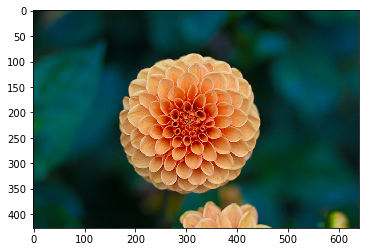

In [5]:
plt.imshow(dataset[0].astype(np.uint8))

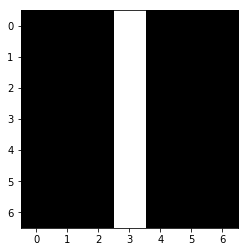

In [6]:
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 # vertical line
filters_test[3, :, :, 1] = 1 # horizontal line
plt.imshow(filters_test[:,:,:,0])
filters = tf.constant(filters_test)

In [7]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], 
                           padding="SAME")

In [8]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

In [9]:
print(output.shape)

(2, 214, 320, 2)


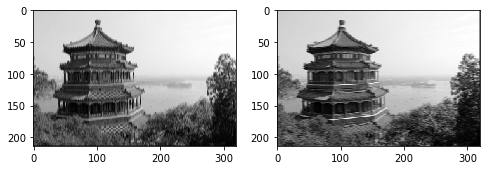

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(output[1,:,:,0], cmap=plt.cm.gray)
axes[1].imshow(output[1,:,:,1], cmap=plt.cm.gray)

In [11]:
pooled = tf.nn.max_pool(X, ksize=[1, 4, 4, 1], 
                        strides=[1, 4, 4, 1], 
                        padding="SAME")

In [12]:
with tf.Session() as sess:
    output = sess.run(pooled, feed_dict={X: dataset})

In [13]:
output.shape

(2, 107, 160, 3)

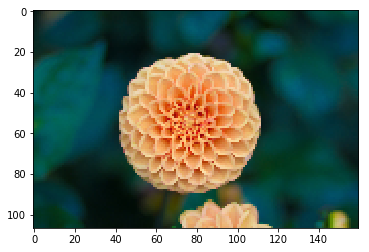

In [14]:
plt.imshow(output[0].astype(np.uint8))

In [15]:
tf.contrib.slim

<module 'tensorflow.contrib.slim' from '/home/dola/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/slim/__init__.py'>